In [4]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import anndata as ad
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import os
import seaborn as sns
from scipy.cluster.hierarchy import linkage, leaves_list
from itertools import combinations
from scipy.stats import spearmanr, kruskal, ttest_ind
import scikit_posthocs as sp
from statsmodels.nonparametric.smoothers_lowess import lowess
from sklearn.metrics import r2_score
import json

In [5]:
extension = 'svg'
save_path = f'/Users/lukashat/Documents/PhD_Schapiro/Projects/Myeloma_Standal/paper/plots/figures/figure_1/{extension}/'
save_path_supp = f'/Users/lukashat/Documents/PhD_Schapiro/Projects/Myeloma_Standal/paper/plots/figures/suppl_figure_1/{extension}/'
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 300
adata = ad.read_h5ad("/Users/lukashat/Documents/PhD_Schapiro/Projects/Myeloma_Standal/results/standard/adatas/cells_final.h5ad")
with open('/Users/lukashat/Documents/PhD_Schapiro/Projects/Myeloma_Standal/github/myeloma_standal/src/Paper/figure_plots/neighborhood_color_map.json', 'r') as f:
    neighborhood_color_map = json.load(f)
with open('/Users/lukashat/Documents/PhD_Schapiro/Projects/Myeloma_Standal/github/myeloma_standal/src/Paper/figure_plots/phenotype_color_map.json', 'r') as f:
    phenotype_color_map = json.load(f)
with open('/Users/lukashat/Documents/PhD_Schapiro/Projects/Myeloma_Standal/github/myeloma_standal/src/Paper/figure_plots/disease_color_map.json', 'r') as f:
    disease_color_map = json.load(f)
with open('/Users/lukashat/Documents/PhD_Schapiro/Projects/Myeloma_Standal/github/myeloma_standal/src/Paper/figure_plots/disease3_color_map.json', 'r') as f:
    disease3_color_map = json.load(f)
neighborhood_colors = [neighborhood_color_map[cat] for cat in list(adata.obs['cellcharter_CN'].cat.categories)]
neighborhood_colors = ListedColormap(neighborhood_colors)
phenotype_colors = [phenotype_color_map[cat] for cat in list(adata.obs['Phenotype4'].cat.categories)]
phenotype_colors = ListedColormap(phenotype_colors)
disease_colors = [disease_color_map[cat] for cat in list(adata.obs['disease2'].cat.categories)]
disease_colors = ListedColormap(disease_colors)
disease3_colors = [disease3_color_map[cat] for cat in list(adata.obs['disease3'].cat.categories)]
disease3_colors = ListedColormap(disease3_colors)

# B

/var/folders/ry/jl4ll0zx1l709rh4r7_0cq6r0000gn/T/ipykernel_27930/1455260571.py:26: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()
/var/folders/ry/jl4ll0zx1l709rh4r7_0cq6r0000gn/T/ipykernel_27930/1455260571.py:27: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


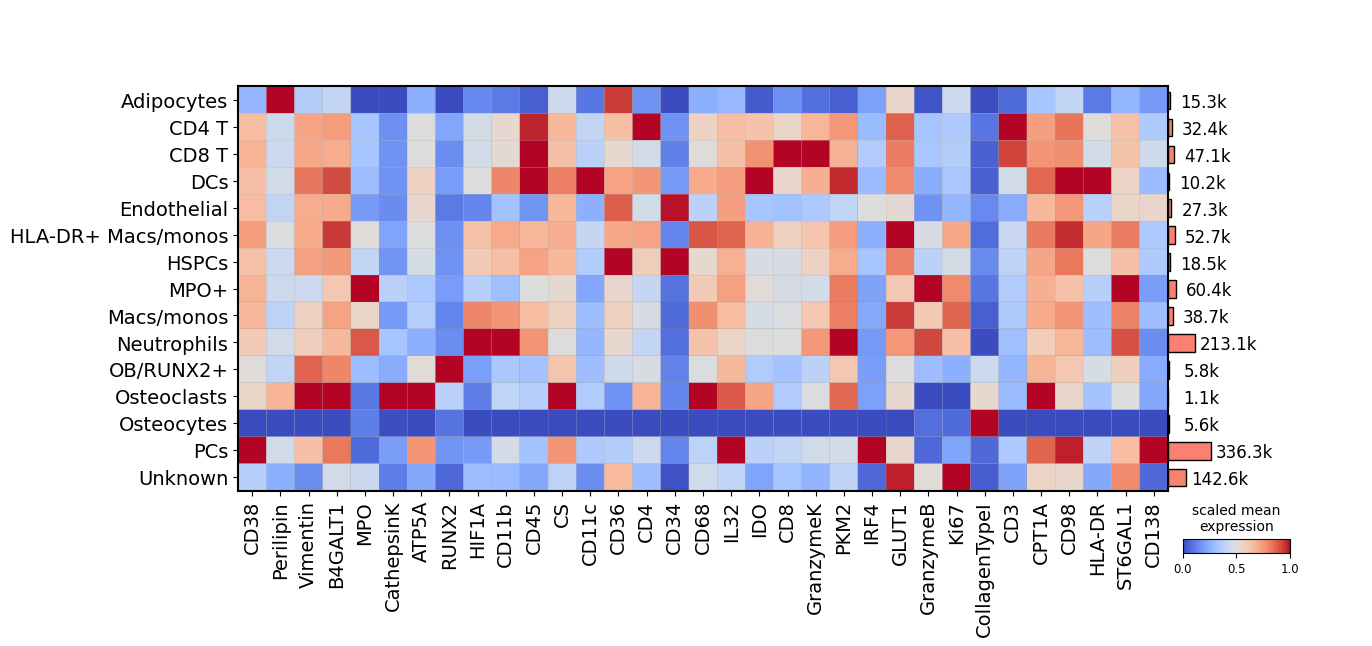

In [5]:
fig = sc.pl.matrixplot(
        adata, 
        var_names=adata.var_names, 
        groupby='Phenotype4', 
        cmap="coolwarm",
        layer='arcsinh',
        standard_scale="var",
        use_raw=False,
        show=False,
        return_fig=True,)
fig.add_totals()
axes = fig.get_axes()
ax = axes['mainplot_ax']
ax.set_yticklabels(ax.get_yticklabels(), fontsize=14)  # Full rotation control
ax.set_xticklabels(ax.get_xticklabels(), fontsize=14)  # Font size
group_ax = axes['group_extra_ax']
for text in group_ax.texts:
    text.set_fontsize(12)
    current_pos = text.get_position()
    text.set_position((current_pos[0] + 14, current_pos[1] +1.5 ))
cax = axes['color_legend_ax']
cax.set_title('scaled mean\nexpression', fontsize=10)
cax_current_pos = cax.get_position()
cax.set_position((cax_current_pos.x0 - 0.05, cax_current_pos.y0 -0.1, cax_current_pos.width, cax_current_pos.height))
fig = axes['mainplot_ax'].figure
fig.tight_layout()
plt.tight_layout()
fig.savefig(os.path.join(save_path_supp, f"phenotype_matrixplot.{extension}"), bbox_inches='tight')

/var/folders/ry/jl4ll0zx1l709rh4r7_0cq6r0000gn/T/ipykernel_24709/1900559071.py:26: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()
/var/folders/ry/jl4ll0zx1l709rh4r7_0cq6r0000gn/T/ipykernel_24709/1900559071.py:27: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


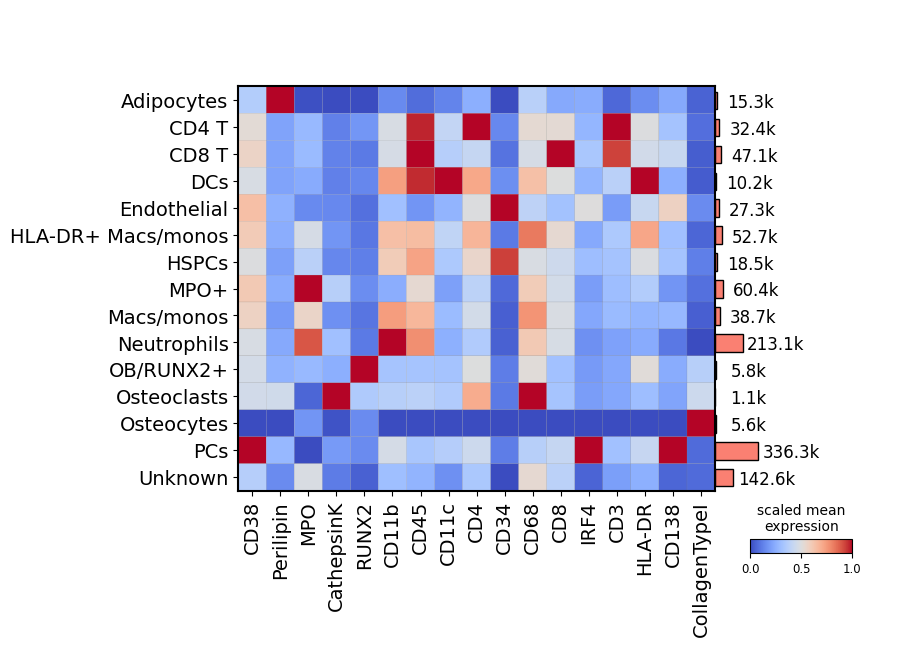

In [ ]:
fig = sc.pl.matrixplot(
        adata, 
        var_names=['CD38', 'Perilipin', 'MPO', 'CathepsinK', 'RUNX2', 'CD11b', 'CD45', 'CD11c', 'CD4', 'CD34', 'CD68', 'CD8', 'IRF4', 'CD3', 'HLA-DR', 'CD138', 'CollagenTypeI'], 
        groupby='Phenotype4', 
        cmap="coolwarm",
        layer='arcsinh',
        standard_scale="var",
        use_raw=False,
        show=False,
        return_fig=True,)
fig.add_totals()
axes = fig.get_axes()
ax = axes['mainplot_ax']
ax.set_yticklabels(ax.get_yticklabels(), fontsize=14)  # Full rotation control
ax.set_xticklabels(ax.get_xticklabels(), fontsize=14)  # Font size
group_ax = axes['group_extra_ax']
for text in group_ax.texts:
    text.set_fontsize(12)
    current_pos = text.get_position()
    text.set_position((current_pos[0] + 14, current_pos[1] +1.5 ))
cax = axes['color_legend_ax']
cax.set_title('scaled mean\nexpression', fontsize=10)
cax_current_pos = cax.get_position()
cax.set_position((cax_current_pos.x0 - 0.06, cax_current_pos.y0 -0.1, cax_current_pos.width, cax_current_pos.height))
fig = axes['mainplot_ax'].figure
fig.tight_layout()
plt.tight_layout()
fig.savefig(os.path.join(save_path, f"phenotype_matrixplot_selected_markers.{extension}"), bbox_inches='tight')

/var/folders/ry/jl4ll0zx1l709rh4r7_0cq6r0000gn/T/ipykernel_24709/833329481.py:23: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()
/var/folders/ry/jl4ll0zx1l709rh4r7_0cq6r0000gn/T/ipykernel_24709/833329481.py:24: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


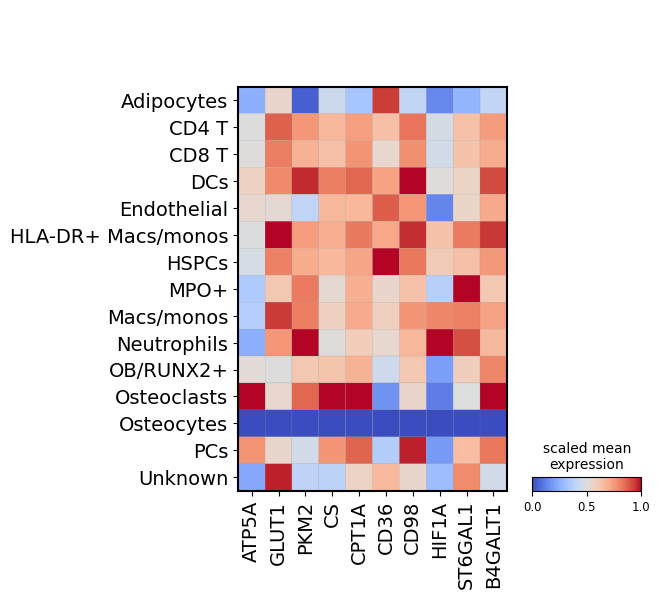

In [5]:
fig = sc.pl.matrixplot(
        adata, 
        var_names=['ATP5A', 'GLUT1', 'PKM2', 'CS', 'CPT1A', 'CD36', 'CD98', 'HIF1A', 'ST6GAL1', 'B4GALT1'], 
        groupby='Phenotype4', 
        cmap="coolwarm",
        layer='arcsinh',
        standard_scale="var",
        use_raw=False,
        show=False,
        return_fig=True,)
#fig.add_totals()
axes = fig.get_axes()
ax = axes['mainplot_ax']
ax.set_yticklabels(ax.get_yticklabels(), fontsize=14)  # Full rotation control
ax.set_xticklabels(ax.get_xticklabels(), fontsize=14) 
#group_ax = axes['group_extra_ax']
# for text in group_ax.texts:
#     current_pos = text.get_position()
#     text.set_position((current_pos[0] + 5, current_pos[1] - 1))
cax = axes['color_legend_ax']
cax.set_title('scaled mean\nexpression', fontsize=10)
fig = axes['mainplot_ax'].figure
fig.tight_layout()
plt.tight_layout()
fig.savefig(os.path.join(save_path, f"phenotype_matrixplot_metabolic_markers.{extension}"), bbox_inches='tight')

# C

## See custom_plotting.ipynb

# D

In [6]:
df = pd.crosstab(
    index=[adata.obs['patient_ID'], adata.obs['disease3']],
    columns=adata.obs['Phenotype4'],
    normalize='index'
)
df = df.reindex(['MM', 'SMM', 'MGUS'], level=1)
df = df.sort_index(level=1, key=lambda x: pd.Categorical(x, categories=['MGUS', 'SMM', 'MM'], ordered=True))
df

,Phenotype4,Adipocytes,CD4 T,CD8 T,DCs,Endothelial,HLA-DR+ Macs/monos,HSPCs,MPO+,Macs/monos,Neutrophils,OB/RUNX2+,Osteoclasts,Osteocytes,PCs,Unknown
patient_ID,disease3,,,,,,,,,,,,,,,
IMC02,MGUS,0.009368,0.016060,0.037473,0.012759,0.013205,0.070753,0.009547,0.053712,0.026053,0.232066,0.004372,0.000000,0.027748,0.139900,0.346984
IMC03,MGUS,0.008185,0.051091,0.025380,0.009838,0.015377,0.067956,0.027116,0.152034,0.034392,0.252563,0.007275,0.000579,0.055142,0.102513,0.190559
IMC04,MGUS,0.014253,0.072145,0.038008,0.025339,0.014341,0.141387,0.019004,0.033345,0.047158,0.269664,0.007830,0.000704,0.006159,0.108305,0.202358
IMC72,MGUS,0.020225,0.018361,0.034904,0.057319,0.010206,0.081551,0.018454,0.018640,0.137192,0.305886,0.002190,0.000000,0.002330,0.058251,0.234494
IMC82,MGUS,0.028604,0.049848,0.047849,0.007887,0.007677,0.134083,0.016721,0.061836,0.042276,0.268482,0.002734,0.000315,0.000736,0.112104,0.218845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
IMC90.1,MM,0.005761,0.053484,0.038069,0.020086,0.005839,0.059790,0.012456,0.041105,0.017750,0.291164,0.004671,0.000467,0.003036,0.332114,0.114208
IMC92,MM,0.016371,0.025529,0.026560,0.005953,0.016829,0.078077,0.017287,0.080710,0.037665,0.412364,0.005953,0.000000,0.000458,0.169777,0.106468
IMC93,MM,0.024680,0.020350,0.058192,0.003464,0.037409,0.025026,0.037842,0.052650,0.057932,0.198563,0.008486,0.001472,0.007534,0.300831,0.165570


/var/folders/ry/jl4ll0zx1l709rh4r7_0cq6r0000gn/T/ipykernel_24709/574208325.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)


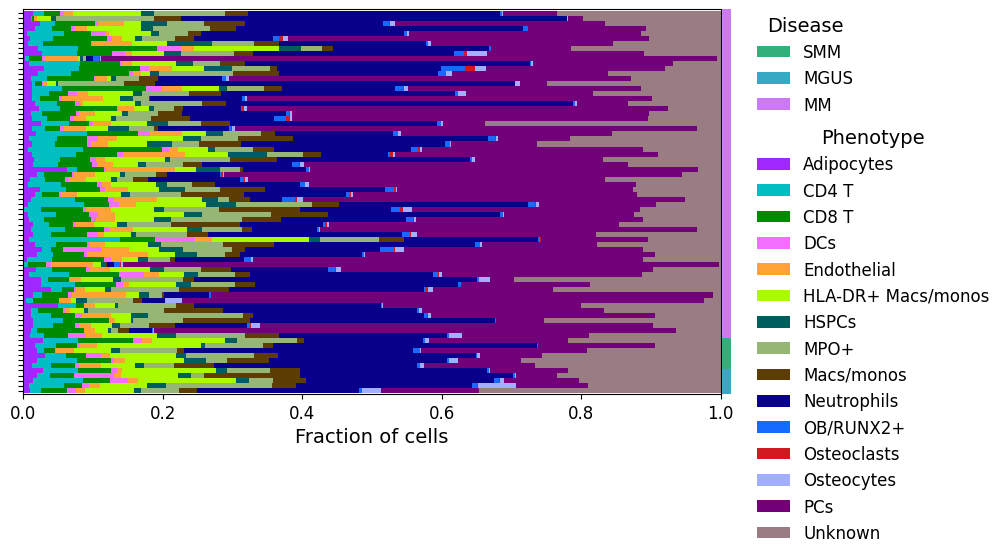

In [7]:
fig, ax = plt.subplots(figsize=(9, 5))
disease_labels = df.index.get_level_values('disease3')
disease_colors = [disease3_color_map[d] for d in disease_labels]

# Main plot
df.plot(kind='barh', stacked=True, colormap=phenotype_colors, width=1, ax=ax)
ax.xaxis.grid(False)  # Explicit x-axis grid removal
ax.yaxis.grid(False)
ax.set_ylabel('')
ax.set_xlabel('Fraction of cells', fontsize=14)
ax.set_yticklabels('')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)
ax.set_xlim(0, 1)

pos = ax.get_position()
pad = 0.001  
cbar_width = 0.01  

pos = ax.get_position()
ax_disease = fig.add_axes([
    pos.x1 + pad,
    pos.y0,
    cbar_width,
    pos.height
]) 


n_patients = len(df)
disease_colors_array = np.array(disease_colors).reshape(n_patients, 1, 3)
ax_disease.imshow(disease_colors_array, 
                aspect='auto', 
                extent=[0, 1, -0.5, n_patients-0.5], 
                origin='lower')

ax_disease.set_xticks([])
ax_disease.set_yticks([])
ax_disease.set_xticklabels([])
ax_disease.set_yticklabels([])

disease_handles = [
    mpatches.Patch(facecolor=color, label=disease)
    for disease, color in disease3_color_map.items()
]


disease_legend = ax.legend(
    handles=disease_handles,
    title='Disease',
    title_fontsize=14,
    loc='upper left',
    framealpha=0,
    bbox_to_anchor=(1.03, 1.022),  
    fontsize=12)
ax.add_artist(disease_legend)
ax.legend(title='Phenotype', loc='upper left', framealpha=0, bbox_to_anchor=(1.03, 0.73), fontsize=12, title_fontsize=14)
ax_disease.set_axis_off()
fig.savefig(os.path.join(save_path, f"phenotype_barplot_patients.{extension}"), bbox_inches='tight')

In [8]:
groups = []
for disease in ['MGUS', 'SMM', 'MM']:
    group = df.xs(disease, level='disease3', drop_level=False)
    # Cluster MM patients using Euclidean distance + Ward linkage
    Z = linkage(group, method='ward', metric='euclidean')
    # Get optimal leaf ordering
    clustered_indices = leaves_list(Z)
    group = group.iloc[clustered_indices]
    groups.append(group)

# Rebuild DataFrame with clustered MM patients
clustered_df = pd.concat(groups)

In [9]:

Z = linkage(df, method='ward', metric='euclidean')
# Get optimal leaf ordering
clustered_indices = leaves_list(Z)
clustered_df= df.iloc[clustered_indices]

/var/folders/ry/jl4ll0zx1l709rh4r7_0cq6r0000gn/T/ipykernel_24709/2545714686.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)


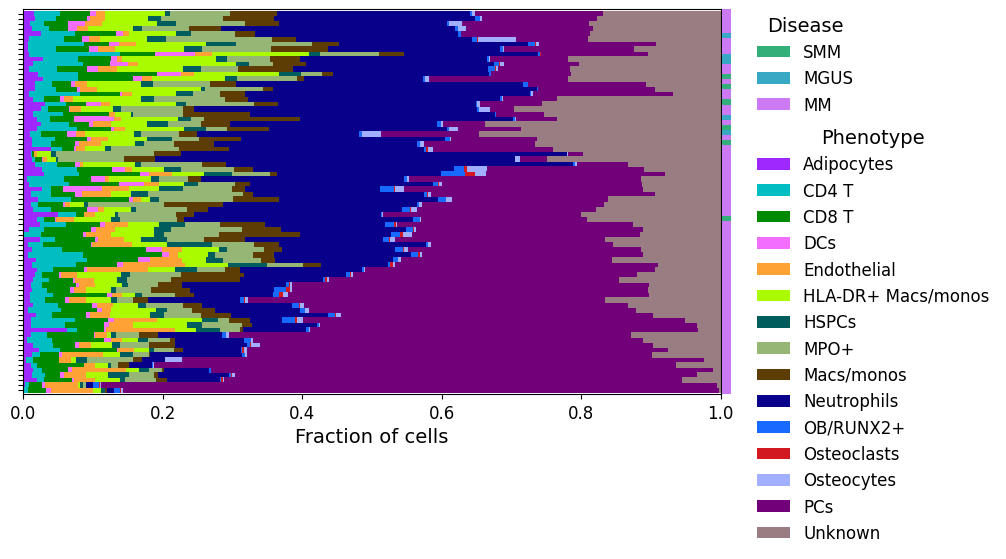

In [10]:
plt.style.use('default')
fig, ax = plt.subplots(figsize=(9, 5))
disease_labels = clustered_df.index.get_level_values('disease3')
disease_colors = [disease3_color_map[d] for d in disease_labels]

clustered_df.plot(kind='barh', stacked=True, colormap=phenotype_colors, edgecolor='none', width=1.15, ax=ax) # Disables all grid lines
ax.xaxis.grid(False)  # Explicit x-axis grid removal
ax.yaxis.grid(False)
ax.set_ylabel('')
ax.set_xlabel('Fraction of cells', fontsize=14)
ax.set_yticklabels('')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)
ax.set_xlim(0, 1)

pos = ax.get_position()
pad = 0.001  
cbar_width = 0.01  

pos = ax.get_position()
ax_disease = fig.add_axes([
    pos.x1 + pad,
    pos.y0,
    cbar_width,
    pos.height
]) 


n_patients = len(df)
disease_colors_array = np.array(disease_colors).reshape(n_patients, 1, 3)
ax_disease.imshow(disease_colors_array, 
                aspect='auto', 
                extent=[0, 1, -0.5, n_patients-0.5], 
                origin='lower')

ax_disease.set_xticks([])
ax_disease.set_yticks([])
ax_disease.set_xticklabels([])
ax_disease.set_yticklabels([])

disease_handles = [
    mpatches.Patch(facecolor=color, label=disease)
    for disease, color in disease3_color_map.items()
]


disease_legend = ax.legend(
    handles=disease_handles,
    title='Disease',
    title_fontsize=14,
    loc='upper left',
    framealpha=0,
    bbox_to_anchor=(1.03, 1.022),  
    fontsize=12)
ax.add_artist(disease_legend)
ax.legend(title='Phenotype', loc='upper left', framealpha=0, bbox_to_anchor=(1.03, 0.73), fontsize=12, title_fontsize=14)
ax_disease.set_axis_off()
fig.savefig(os.path.join(save_path, f"phenotype_barplot_patients.{extension}"), bbox_inches='tight')

In [11]:
roi_df = pd.crosstab(
    index=[adata.obs['patient_ID'], adata.obs['ROI']],
    columns=adata.obs['Phenotype4'],
    normalize='index'
)
roi_df = roi_df.reset_index()
roi_df

Phenotype4,patient_ID,ROI,Adipocytes,CD4 T,CD8 T,DCs,Endothelial,HLA-DR+ Macs/monos,HSPCs,MPO+,Macs/monos,Neutrophils,OB/RUNX2+,Osteoclasts,Osteocytes,PCs,Unknown
0,IMC01,001,0.007794,0.013935,0.029287,0.010392,0.022674,0.084790,0.028342,0.101086,0.065187,0.276098,0.004251,0.000000,0.025035,0.149268,0.181861
1,IMC01,002,0.012228,0.025815,0.039629,0.036458,0.025589,0.073822,0.026495,0.098279,0.030571,0.206975,0.002038,0.000000,0.013813,0.213089,0.195199
2,IMC02,001,0.008143,0.015816,0.041810,0.009552,0.009396,0.061228,0.009239,0.039148,0.018791,0.264955,0.004385,0.000000,0.000000,0.150016,0.367523
3,IMC02,002,0.010991,0.016383,0.031730,0.017005,0.018250,0.083368,0.009954,0.072999,0.035670,0.188511,0.004355,0.000000,0.064496,0.126504,0.319784
4,IMC03,001,0.009011,0.032038,0.027433,0.004205,0.010613,0.044854,0.018622,0.139367,0.030437,0.271926,0.005406,0.000000,0.081298,0.106127,0.218662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,IMC93,002,0.022796,0.012068,0.050285,0.002514,0.030339,0.011230,0.030171,0.047938,0.051458,0.160577,0.006202,0.002179,0.008213,0.402782,0.161247
148,IMC95,001,0.020702,0.003375,0.004275,0.000450,0.008101,0.030378,0.006301,0.080558,0.074707,0.558731,0.001125,0.000000,0.003150,0.031053,0.177093
149,IMC95,002,0.005871,0.000125,0.001749,0.000125,0.001624,0.015988,0.005996,0.175618,0.018486,0.548838,0.000500,0.000000,0.000000,0.015738,0.209343
150,IMC96,001,0.023121,0.008555,0.016069,0.004277,0.015723,0.103468,0.017341,0.069595,0.059538,0.320809,0.004740,0.000000,0.001850,0.085665,0.269249


In [12]:
correlation_results = []

# Group by patient_ID
for patient_id, group in roi_df.groupby('patient_ID'):
    if len(group) > 1:  # Only process patients with more than one ROI
        rois = group.set_index('ROI').iloc[:, 1:]  # Drop patient_ID and keep phenotype frequencies
        
        # Compute pairwise correlations for all ROI combinations
        for roi1, roi2 in combinations(rois.index, 2):
            corr, _ = spearmanr(rois.loc[roi1], rois.loc[roi2])
            correlation_results.append({'patient_ID': patient_id, 'ROI1': roi1, 'ROI2': roi2, 'correlation': corr})
correlation_df = pd.DataFrame(correlation_results)

/var/folders/ry/jl4ll0zx1l709rh4r7_0cq6r0000gn/T/ipykernel_24709/3092966533.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for patient_id, group in roi_df.groupby('patient_ID'):


/var/folders/ry/jl4ll0zx1l709rh4r7_0cq6r0000gn/T/ipykernel_24709/1943007344.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='disease3', y='correlation', data=merged_df, order=['MGUS', 'SMM', 'MM'], palette=disease3_color_map, showcaps=False, linewidth=2, width=0.75)
/var/folders/ry/jl4ll0zx1l709rh4r7_0cq6r0000gn/T/ipykernel_24709/1943007344.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)
/var/folders/ry/jl4ll0zx1l709rh4r7_0cq6r0000gn/T/ipykernel_24709/1943007344.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)


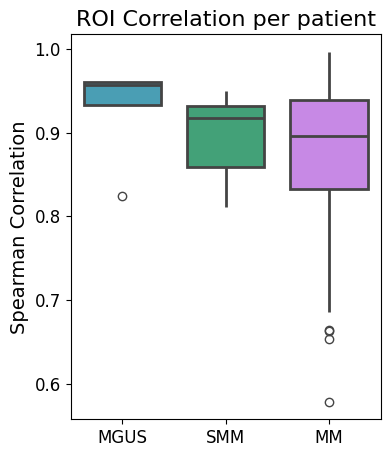

In [13]:
# Merge correlation data with disease labels
merged_df = pd.merge(
    correlation_df, 
    adata.obs[['patient_ID', 'disease3']].drop_duplicates(), 
    on='patient_ID'
)

# Plot
plt.figure(figsize=(4, 5))
sns.boxplot(x='disease3', y='correlation', data=merged_df, order=['MGUS', 'SMM', 'MM'], palette=disease3_color_map, showcaps=False, linewidth=2, width=0.75)
#sns.stripplot(x='disease3', y='correlation', data=merged_df, color='black', alpha=0.5)
plt.xlabel('')
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)
plt.ylabel('Spearman Correlation', fontsize=14)
plt.title("ROI Correlation per patient", fontsize=16)
plt.savefig(os.path.join(save_path, f"roi_correlation.{extension}"))


# per patient data for PC comparison

In [14]:
df = pd.crosstab(
    index=[adata.obs['patient_ID'], adata.obs['disease3']],
    columns=adata.obs['Phenotype4'],
    normalize='index'
)
df = df.reindex(['MM', 'SMM', 'MGUS'], level=1)
df = df.sort_index(level=1, key=lambda x: pd.Categorical(x, categories=['MGUS', 'SMM', 'MM'], ordered=True))
df

,Phenotype4,Adipocytes,CD4 T,CD8 T,DCs,Endothelial,HLA-DR+ Macs/monos,HSPCs,MPO+,Macs/monos,Neutrophils,OB/RUNX2+,Osteoclasts,Osteocytes,PCs,Unknown
patient_ID,disease3,,,,,,,,,,,,,,,
IMC02,MGUS,0.009368,0.016060,0.037473,0.012759,0.013205,0.070753,0.009547,0.053712,0.026053,0.232066,0.004372,0.000000,0.027748,0.139900,0.346984
IMC03,MGUS,0.008185,0.051091,0.025380,0.009838,0.015377,0.067956,0.027116,0.152034,0.034392,0.252563,0.007275,0.000579,0.055142,0.102513,0.190559
IMC04,MGUS,0.014253,0.072145,0.038008,0.025339,0.014341,0.141387,0.019004,0.033345,0.047158,0.269664,0.007830,0.000704,0.006159,0.108305,0.202358
IMC72,MGUS,0.020225,0.018361,0.034904,0.057319,0.010206,0.081551,0.018454,0.018640,0.137192,0.305886,0.002190,0.000000,0.002330,0.058251,0.234494
IMC82,MGUS,0.028604,0.049848,0.047849,0.007887,0.007677,0.134083,0.016721,0.061836,0.042276,0.268482,0.002734,0.000315,0.000736,0.112104,0.218845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
IMC90.1,MM,0.005761,0.053484,0.038069,0.020086,0.005839,0.059790,0.012456,0.041105,0.017750,0.291164,0.004671,0.000467,0.003036,0.332114,0.114208
IMC92,MM,0.016371,0.025529,0.026560,0.005953,0.016829,0.078077,0.017287,0.080710,0.037665,0.412364,0.005953,0.000000,0.000458,0.169777,0.106468
IMC93,MM,0.024680,0.020350,0.058192,0.003464,0.037409,0.025026,0.037842,0.052650,0.057932,0.198563,0.008486,0.001472,0.007534,0.300831,0.165570


In [15]:
df = df.reset_index()
df = df[[col for col in df.columns if col in ['patient_ID', 'disease3', 'PCs']]]
df

Phenotype4,patient_ID,disease3,PCs
0,IMC02,MGUS,0.139900
1,IMC03,MGUS,0.102513
2,IMC04,MGUS,0.108305
3,IMC72,MGUS,0.058251
4,IMC82,MGUS,0.112104
...,...,...,...
71,IMC90.1,MM,0.332114
72,IMC92,MM,0.169777
73,IMC93,MM,0.300831
74,IMC95,MM,0.021205


/var/folders/ry/jl4ll0zx1l709rh4r7_0cq6r0000gn/T/ipykernel_24709/2524161672.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='disease3', y='PCs', palette=disease3_color_map, showcaps=False, linewidth=2, width=0.75)


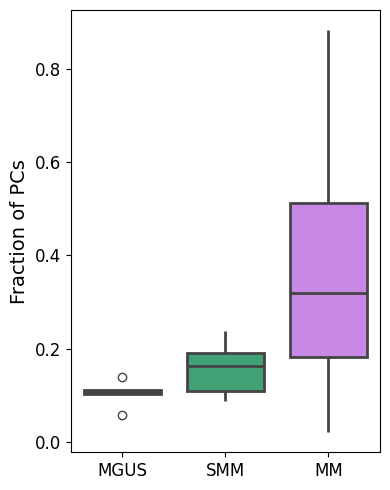

In [16]:
fig, ax = plt.subplots(figsize=(4, 5))
sns.boxplot(data=df, x='disease3', y='PCs', palette=disease3_color_map, showcaps=False, linewidth=2, width=0.75)
plt.xlabel('')
plt.ylabel('Fraction of PCs', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig(os.path.join(save_path, f"pc_boxplot.{extension}"), bbox_inches='tight')

In [17]:
groups = [group['PCs'].values for _, group in df.groupby('disease3')]
kruskal_result = kruskal(*groups)
print(f"Kruskal-Wallis H-stat: {kruskal_result.statistic:.3f}, p-val: {kruskal_result.pvalue:.4f}")

Kruskal-Wallis H-stat: 13.135, p-val: 0.0014


In [18]:
dunn_results = sp.posthoc_dunn(
    df,
    val_col='PCs',
    group_col='disease3',
    p_adjust='holm-sidak',
)
print("\nDunn's posthoc results:")
dunn_results


Dunn's posthoc results:


,MGUS,MM,SMM
MGUS,1.000000,0.008973,0.515297
MM,0.008973,1.000000,0.041921
SMM,0.515297,0.041921,1.000000


# Proliferation


In [19]:
adata2 = ad.read_h5ad("/Users/lukashat/Documents/PhD_Schapiro/Projects/Myeloma_Standal/results/standard/adatas/cells_thresholds_scanorama.h5ad")
adata2 = adata2[adata2.obs.index.isin(adata.obs.index)]
adata.obs['Ki67_counts'] = adata2.obs['Ki67_counts'].reindex(adata.obs.index)
adata.obs['proliferating_cells'] =  adata.obs['Phenotype4'].astype(str) + '_' + adata2.obs['Ki67_counts'].astype(str)
# Filter for plasma cells and prepare the dataframe
df = adata[(adata.obs['Phenotype4'] == 'PCs')].obs[['distance_to_bone_corrected', 'disease3', 'image_ID', 'proliferating_cells']]
bins = list(range(0, 601, 20)) #+ list(range(200, 1001, 250)) 
# Bin distances
df['distance_bin'] = pd.cut(df['distance_to_bone_corrected'], bins=bins)

# Group by disease and distance bins
disease_distance_summary = df.groupby(['disease3', 'distance_bin']).apply(
    lambda x: pd.Series({
        'total_cells': len(x),
        'proliferating_cells': (x['proliferating_cells'] == 'PCs_1').sum()
    })
)
disease_distance_summary['proliferating_ratio'] = disease_distance_summary['proliferating_cells'] / disease_distance_summary['total_cells']
disease_distance_summary

/var/folders/ry/jl4ll0zx1l709rh4r7_0cq6r0000gn/T/ipykernel_24709/981064486.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['distance_bin'] = pd.cut(df['distance_to_bone_corrected'], bins=bins)
/var/folders/ry/jl4ll0zx1l709rh4r7_0cq6r0000gn/T/ipykernel_24709/981064486.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disease_distance_summary = df.groupby(['disease3', 'distance_bin']).apply(
/var/folders/ry/jl4ll0zx1l709rh4r7_0cq6r0000gn/T/ipykernel_24709/981064486.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. Th

total_cells  proliferating_cells  proliferating_ratio
disease3 distance_bin                                                       
MGUS     (0, 20]               502                   98             0.195219
         (20, 40]              289                   71             0.245675
         (40, 60]              352                   78             0.221591
         (60, 80]              312                   84             0.269231
         (80, 100]             275                   78             0.283636
...                            ...                  ...                  ...
SMM      (500, 520]             73                   21             0.287671
         (520, 540]             59                    9             0.152542
         (540, 560]             29                    5             0.172414
         (560, 580]             24                    6             0.250000
         (580, 600]             12                    2             0.166667

[90 rows x 3 columns]

In [33]:
disease_mapping = adata.obs[['disease3', 'image_ID']].drop_duplicates()
disease_mapping = disease_mapping.set_index('image_ID')
disease_mapping

,disease3
image_ID,
TS-373_IMC77_B_001.csv,MM
TS-373_IMC03_MGUS_002.csv,MGUS
TS-373_IMC04_MGUS_002.csv,MGUS
TS-373_IMC72_MGUS_001.csv,MGUS
TS-373_IMC12_UB_001.csv,MM
...,...
TS-373_IMC41_MGUS_001.csv,SMM
TS-373_IMC87-1_UB_001.csv,MM
TS-373_IMC53_B_002.csv,MM


In [64]:
adata2 = ad.read_h5ad("/Users/lukashat/Documents/PhD_Schapiro/Projects/Myeloma_Standal/results/standard/adatas/cells_thresholds_scanorama.h5ad")
adata2 = adata2[adata2.obs.index.isin(adata.obs.index)]
adata.obs['Ki67_counts'] = adata2.obs['Ki67_counts'].reindex(adata.obs.index)
adata.obs['proliferating_cells'] =  adata.obs['Phenotype4'].astype(str) + '_' + adata2.obs['Ki67_counts'].astype(str)
# Filter for plasma cells and prepare the dataframe
df = adata[(adata.obs['Phenotype4'] == 'PCs')].obs[['distance_to_bone_corrected', 'disease3', 'image_ID', 'proliferating_cells']]
bins = list(range(0, 301, 20)) #+ list(range(200, 1001, 250)) 
# Bin distances
df['distance_bin'] = pd.cut(df['distance_to_bone_corrected'], bins=bins)

# Group by disease and distance bins
disease_distance_summary = df.groupby(['image_ID', 'distance_bin']).apply(
    lambda x: pd.Series({
        'total_cells': len(x),
        'proliferating_cells': (x['proliferating_cells'] == 'PCs_1').sum()
    })
)
disease_distance_summary['proliferating_ratio'] = disease_distance_summary['proliferating_cells'] / disease_distance_summary['total_cells']
disease_distance_summary.reset_index(inplace=True)
disease_distance_summary

/var/folders/ry/jl4ll0zx1l709rh4r7_0cq6r0000gn/T/ipykernel_24709/4207916609.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['distance_bin'] = pd.cut(df['distance_to_bone_corrected'], bins=bins)
/var/folders/ry/jl4ll0zx1l709rh4r7_0cq6r0000gn/T/ipykernel_24709/4207916609.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disease_distance_summary = df.groupby(['image_ID', 'distance_bin']).apply(
/var/folders/ry/jl4ll0zx1l709rh4r7_0cq6r0000gn/T/ipykernel_24709/4207916609.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns.

,image_ID,distance_bin,total_cells,proliferating_cells,proliferating_ratio
0,TS-373_IMC01_UB_001.csv,"(0, 20]",157.0,43.0,0.273885
1,TS-373_IMC01_UB_001.csv,"(20, 40]",128.0,23.0,0.179688
2,TS-373_IMC01_UB_001.csv,"(40, 60]",109.0,29.0,0.266055
3,TS-373_IMC01_UB_001.csv,"(60, 80]",95.0,19.0,0.200000
4,TS-373_IMC01_UB_001.csv,"(80, 100]",49.0,9.0,0.183673
...,...,...,...,...,...
2275,TS-373_IMC96_B_002.csv,"(200, 220]",NaN,NaN,NaN
2276,TS-373_IMC96_B_002.csv,"(220, 240]",NaN,NaN,NaN
2277,TS-373_IMC96_B_002.csv,"(240, 260]",NaN,NaN,NaN
2278,TS-373_IMC96_B_002.csv,"(260, 280]",NaN,NaN,NaN


In [65]:
disease_distance_summary['disease3'] = disease_distance_summary['image_ID'].map(disease_mapping['disease3'])
disease_distance_summary

,image_ID,distance_bin,total_cells,proliferating_cells,proliferating_ratio,disease3
0,TS-373_IMC01_UB_001.csv,"(0, 20]",157.0,43.0,0.273885,MM
1,TS-373_IMC01_UB_001.csv,"(20, 40]",128.0,23.0,0.179688,MM
2,TS-373_IMC01_UB_001.csv,"(40, 60]",109.0,29.0,0.266055,MM
3,TS-373_IMC01_UB_001.csv,"(60, 80]",95.0,19.0,0.200000,MM
4,TS-373_IMC01_UB_001.csv,"(80, 100]",49.0,9.0,0.183673,MM
...,...,...,...,...,...,...
2275,TS-373_IMC96_B_002.csv,"(200, 220]",NaN,NaN,NaN,MM
2276,TS-373_IMC96_B_002.csv,"(220, 240]",NaN,NaN,NaN,MM
2277,TS-373_IMC96_B_002.csv,"(240, 260]",NaN,NaN,NaN,MM
2278,TS-373_IMC96_B_002.csv,"(260, 280]",NaN,NaN,NaN,MM


In [66]:
summary_stats = disease_distance_summary.groupby(['distance_bin', 'disease3'], observed=True)['proliferating_ratio'].agg(['mean', 'sem']).reset_index()
summary_stats['distance_bin'] = summary_stats['distance_bin'].astype(str)
summary_stats

,distance_bin,disease3,mean,sem
0,"(0, 20]",MGUS,0.152909,0.044404
1,"(0, 20]",MM,0.152867,0.010485
2,"(0, 20]",SMM,0.106527,0.030926
3,"(20, 40]",MGUS,0.223790,0.038657
4,"(20, 40]",MM,0.200481,0.011334
5,"(20, 40]",SMM,0.189279,0.037098
6,"(40, 60]",MGUS,0.193619,0.048075
7,"(40, 60]",MM,0.223037,0.012018
8,"(40, 60]",SMM,0.144171,0.028084
9,"(60, 80]",MGUS,0.230992,0.036959


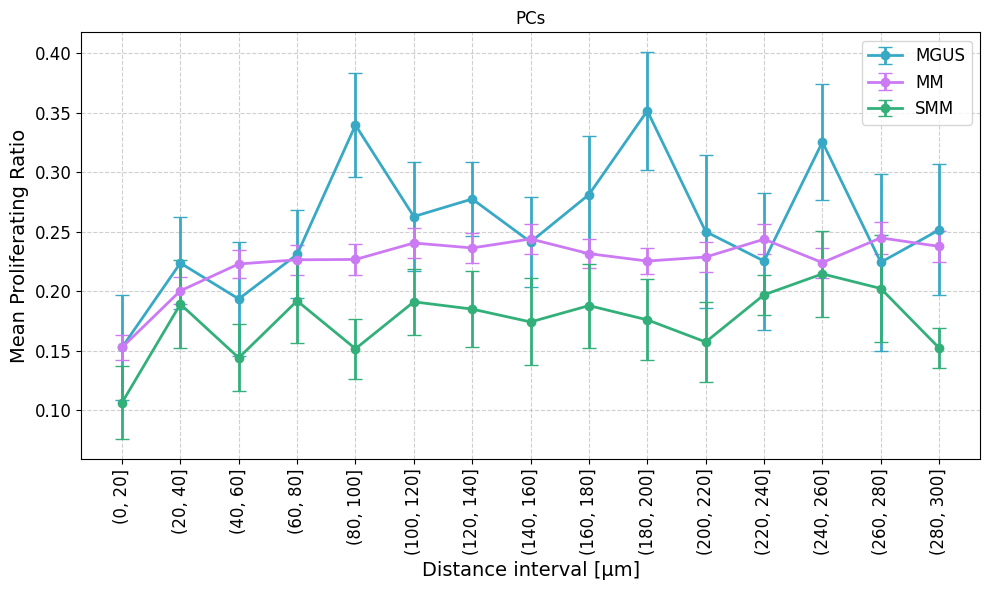

In [75]:
plt.figure(figsize=(10, 6))
plt.style.use('default')
for disease in summary_stats['disease3'].unique():
    subset = summary_stats[summary_stats['disease3'] == disease]
    color = disease3_color_map.get(disease) 
    
    plt.errorbar(
        x=subset['distance_bin'].astype(str),
        y=subset['mean'], 
        yerr=subset['sem'],
        label=disease,
        marker='o', 
        linestyle='-', 
        capsize=5, 
        color=color ,
        linewidth=2,
    )

plt.xticks(rotation=90)
plt.xlabel('Distance interval [µm]', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Mean Proliferating Ratio', fontsize=14)
plt.title('PCs')
plt.legend(title='', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6) 
plt.tight_layout() 
plt.savefig(os.path.join(save_path, f"mean proliferation_distance_to_bone.{extension}"))

In [67]:
disease_distance_summary['distance_bin'] = disease_distance_summary['distance_bin'].astype(str)

In [71]:
zero_twenty = disease_distance_summary[(disease_distance_summary['distance_bin'] == '(0, 20]') & (disease_distance_summary['disease3'] == 'MM')]['proliferating_ratio'].values
twenty_forty = disease_distance_summary[(disease_distance_summary['distance_bin'] == '(20, 40]') & (disease_distance_summary['disease3'] == 'MM')]['proliferating_ratio'].values
forty_sixty = disease_distance_summary[(disease_distance_summary['distance_bin'] == '(40, 60]') & (disease_distance_summary['disease3'] == 'MM')]['proliferating_ratio'].values
stats, pval = ttest_ind(zero_twenty, twenty_forty, equal_var=True, nan_policy='omit')
print(f"t-test between (0, 20] and (20, 40]: t-stat: {stats:.3f}, p-val: {pval:.4f}")
stats, pval = ttest_ind(twenty_forty, forty_sixty, equal_var=True, nan_policy='omit')
print(f"t-test between (20, 40] and (40, 60]: t-stat: {stats:.3f}, p-val: {pval:.4f}")

t-test between (0, 20] and (20, 40]: t-stat: -3.083, p-val: 0.0023
t-test between (20, 40] and (40, 60]: t-stat: -1.366, p-val: 0.1733


In [76]:
zero_twenty = disease_distance_summary[(disease_distance_summary['distance_bin'] == '(0, 20]') & (disease_distance_summary['disease3'] == 'SMM')]['proliferating_ratio'].values
twenty_forty = disease_distance_summary[(disease_distance_summary['distance_bin'] == '(20, 40]') & (disease_distance_summary['disease3'] == 'SMM')]['proliferating_ratio'].values
forty_sixty = disease_distance_summary[(disease_distance_summary['distance_bin'] == '(40, 60]') & (disease_distance_summary['disease3'] == 'SMM')]['proliferating_ratio'].values
stats, pval = ttest_ind(zero_twenty, twenty_forty, equal_var=True, nan_policy='omit')
print(f"t-test between (0, 20] and (20, 40]: t-stat: {stats:.3f}, p-val: {pval:.4f}")
stats, pval = ttest_ind(twenty_forty, forty_sixty, equal_var=True, nan_policy='omit')
print(f"t-test between (20, 40] and (40, 60]: t-stat: {stats:.3f}, p-val: {pval:.4f}")

t-test between (0, 20] and (20, 40]: t-stat: -1.713, p-val: 0.1038
t-test between (20, 40] and (40, 60]: t-stat: 0.969, p-val: 0.3452


In [77]:
zero_twenty = disease_distance_summary[(disease_distance_summary['distance_bin'] == '(0, 20]') & (disease_distance_summary['disease3'] == 'MGUS')]['proliferating_ratio'].values
twenty_forty = disease_distance_summary[(disease_distance_summary['distance_bin'] == '(20, 40]') & (disease_distance_summary['disease3'] == 'MGUS')]['proliferating_ratio'].values
forty_sixty = disease_distance_summary[(disease_distance_summary['distance_bin'] == '(40, 60]') & (disease_distance_summary['disease3'] == 'MGUS')]['proliferating_ratio'].values
stats, pval = ttest_ind(zero_twenty, twenty_forty, equal_var=True, nan_policy='omit')
print(f"t-test between (0, 20] and (20, 40]: t-stat: {stats:.3f}, p-val: {pval:.4f}")
stats, pval = ttest_ind(twenty_forty, forty_sixty, equal_var=True, nan_policy='omit')
print(f"t-test between (20, 40] and (40, 60]: t-stat: {stats:.3f}, p-val: {pval:.4f}")

t-test between (0, 20] and (20, 40]: t-stat: -1.210, p-val: 0.2450
t-test between (20, 40] and (40, 60]: t-stat: 0.489, p-val: 0.6314


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, '(0, 20]'),
  Text(1, 0, '(20, 40]'),
  Text(2, 0, '(40, 60]'),
  Text(3, 0, '(60, 80]'),
  Text(4, 0, '(80, 100]'),
  Text(5, 0, '(100, 120]'),
  Text(6, 0, '(120, 140]'),
  Text(7, 0, '(140, 160]'),
  Text(8, 0, '(160, 180]'),
  Text(9, 0, '(180, 200]'),
  Text(10, 0, '(200, 220]'),
  Text(11, 0, '(220, 240]'),
  Text(12, 0, '(240, 260]'),
  Text(13, 0, '(260, 280]'),
  Text(14, 0, '(280, 300]')])

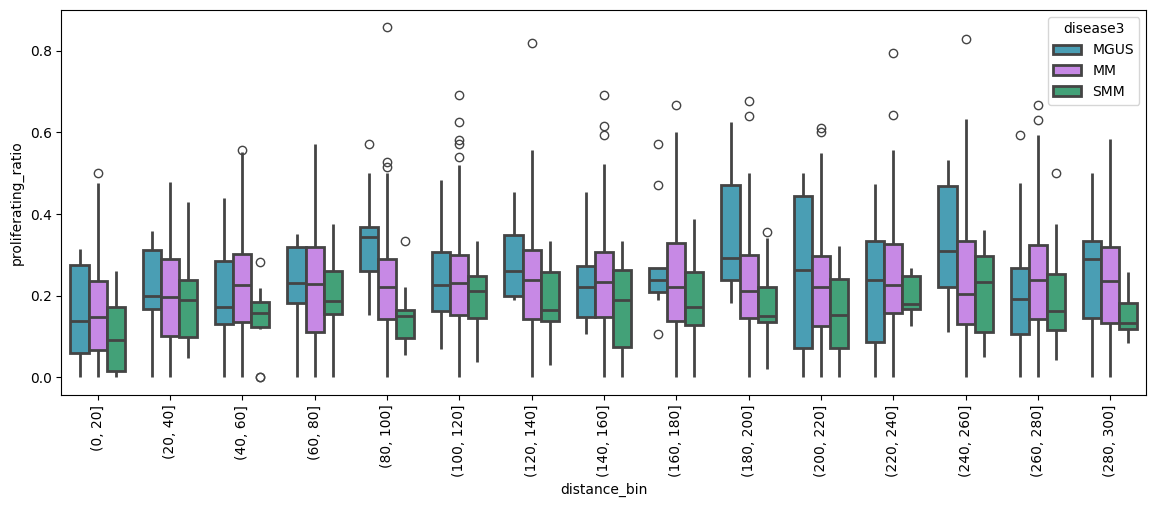

In [43]:
plt.figure(figsize=(14, 5))
sns.boxplot(data=disease_distance_summary, x='distance_bin', y='proliferating_ratio', hue='disease3', palette=disease3_color_map, showcaps=False, linewidth=2, width=0.75)
plt.xticks(rotation=90)

In [ ]:
adata2 = ad.read_h5ad("/Users/lukashat/Documents/PhD_Schapiro/Projects/Myeloma_Standal/results/standard/adatas/cells_thresholds_scanorama.h5ad")
adata2 = adata2[adata2.obs.index.isin(adata.obs.index)]
adata.obs['Ki67_counts'] = adata2.obs['Ki67_counts'].reindex(adata.obs.index)
adata.obs['proliferating_cells'] =  adata.obs['Phenotype4'].astype(str) + '_' + adata2.obs['Ki67_counts'].astype(str)
# Filter for plasma cells and prepare the dataframe
df = adata[(adata.obs['Phenotype4'] == 'PCs')].obs[['distance_to_bone_corrected', 'disease3', 'image_ID', 'proliferating_cells']]
bins = list(range(0, 601, 20)) #+ list(range(200, 1001, 250)) 
# Bin distances
df['distance_bin'] = pd.cut(df['distance_to_bone_corrected'], bins=bins)

# Group by disease and distance bins
disease_distance_summary = df.groupby(['disease3', 'distance_bin']).apply(
    lambda x: pd.Series({
        'total_cells': len(x),
        'proliferating_cells': (x['proliferating_cells'] == 'PCs_1').sum()
    })
)
disease_distance_summary['proliferating_ratio'] = disease_distance_summary['proliferating_cells'] / disease_distance_summary['total_cells']
disease_distance_summary

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/var/folders/ry/jl4ll0zx1l709rh4r7_0cq6r0000gn/T/ipykernel_24709/1634692822.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)
/var/folders/ry/jl4ll0zx1l709rh4r7_0cq6r0000gn/T/ipykernel_24709/1634692822.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)


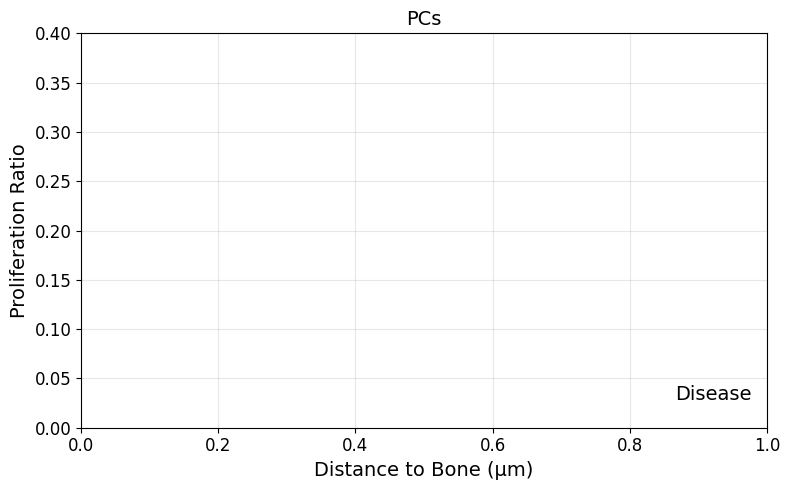

In [32]:
# Create a line plot for each disease category
plt.figure(figsize=(8, 5))

# Get unique disease categories
disease_categories = df['disease3'].unique()

# Define a color palette for the different diseases
colors = disease3_color_map

# Plot each disease category
for i, disease in enumerate(disease_categories):
    if disease in disease_distance_summary.index.get_level_values(0):
        # Get data for this disease
        disease_data = disease_distance_summary.loc[disease]
        
        # Convert bin intervals to midpoints
        midpoints = [interval.mid for interval in disease_data.index]
        
        # Plot line
        plt.plot(midpoints, disease_data['proliferating_ratio'], 
                marker='o', linestyle='-', color=disease3_color_map[disease], 
                label=f"{disease}")

# Format plot
plt.xlabel('Distance to Bone (µm)', fontsize=14)
plt.ylabel('Proliferation Ratio', fontsize=14)
plt.ylim(0, 0.4)
plt.title('PCs', fontsize=14)
plt.grid(alpha=0.3)
plt.legend(loc='lower right', framealpha=0, title='Disease', title_fontsize=14, fontsize=12)


ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)
plt.tight_layout()
#plt.savefig(os.path.join(save_path, f"proliferation_distance_to_bone.{extension}"))

/var/folders/ry/jl4ll0zx1l709rh4r7_0cq6r0000gn/T/ipykernel_24709/4102232562.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)
/var/folders/ry/jl4ll0zx1l709rh4r7_0cq6r0000gn/T/ipykernel_24709/4102232562.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)


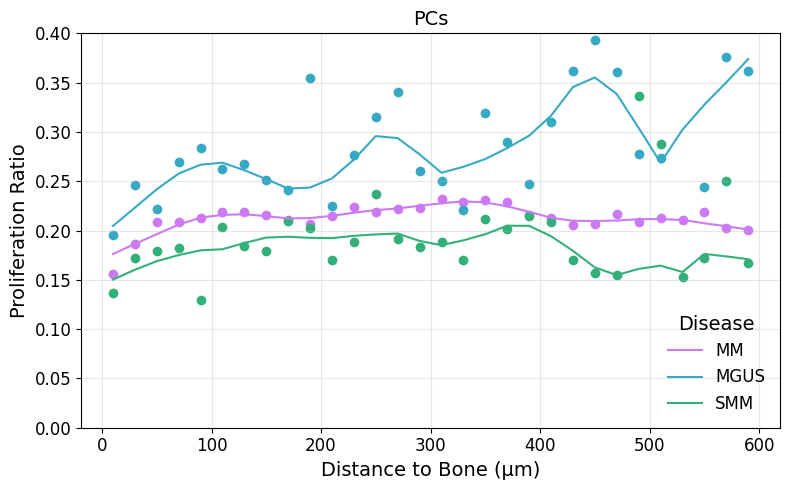

In [22]:
# Create a line plot for each disease category
plt.figure(figsize=(8, 5))

# Get unique disease categories
disease_categories = df['disease3'].unique()

# Define a color palette for the different diseases
colors = disease3_color_map

# Plot each disease category
for disease in disease_categories:
    if disease in disease_distance_summary.index.get_level_values(0):
        disease_data = disease_distance_summary.loc[disease]
        disease_data = disease_data.sort_index()

        midpoints = [interval.mid for interval in disease_data.index]
        ratios = disease_data['proliferating_ratio'].values
        smoothed = lowess(ratios, midpoints, frac=0.25, is_sorted=True)
        plt.plot(smoothed[:, 0], smoothed[:, 1], linestyle='-', color=disease3_color_map[disease], 
                label=f"{disease}")
        plt.scatter(midpoints, ratios, color=disease3_color_map[disease])
        
plt.xlabel('Distance to Bone (µm)', fontsize=14)
plt.ylabel('Proliferation Ratio', fontsize=14)
plt.ylim(0, 0.4)
plt.title('PCs', fontsize=14)
plt.grid(alpha=0.3)
plt.legend(loc='lower right', framealpha=0, title='Disease', title_fontsize=14, fontsize=12)


ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)
plt.tight_layout()
plt.savefig(os.path.join(save_path, f"proliferation_distance_to_bone.{extension}"))

# D

/Users/lukashat/miniforge3/envs/cellcharter_scarches/lib/python3.9/site-packages/scanpy/plotting/_anndata.py:900: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(
/var/folders/ry/jl4ll0zx1l709rh4r7_0cq6r0000gn/T/ipykernel_24709/3211970707.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=12)
/var/folders/ry/jl4ll0zx1l709rh4r7_0cq6r0000gn/T/ipykernel_24709/3211970707.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontsize=12)


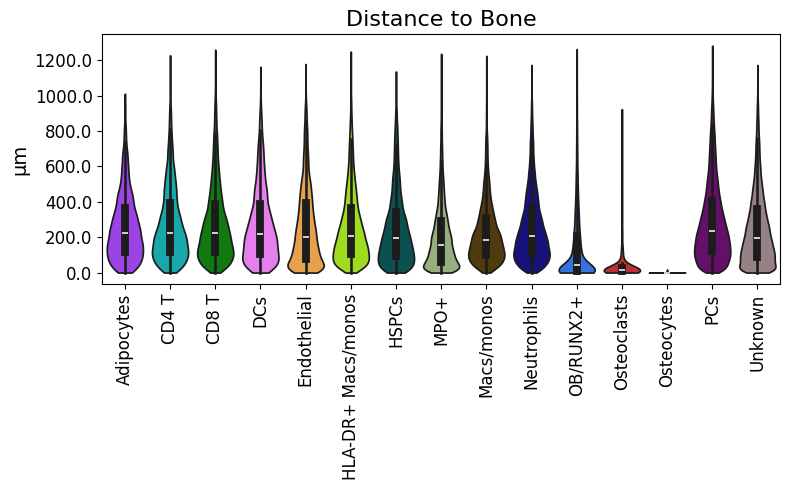

In [23]:
fig,ax = plt.subplots(figsize=(8, 5))
sc.pl.violin(adata, keys='distance_to_bone_corrected', groupby='Phenotype4', palette=phenotype_color_map, stripplot=False, rotation=90, inner='box', show=False, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=12)
ax.set_xlabel('')
ax.set_ylabel('µm', fontsize=14)
ax.set_yticklabels(ax.get_yticks(), fontsize=12)
ax.set_title('Distance to Bone', fontsize=16)
plt.tight_layout()
fig.savefig(os.path.join(save_path, f"distance_to_bone_violin.{extension}"))

# Percent from Pathologist with phenotypes in ROI

In [6]:
biopsy_pc_fraction = pd.read_excel('/Users/lukashat/Documents/PhD_Schapiro/Projects/Myeloma_Standal/metadata/percent PCs in biopsies.xlsx')
biopsy_pc_fraction['IMC label'] = biopsy_pc_fraction['IMC label'].astype(str)
biopsy_pc_fraction['IMC label'] = ['IMC' + (x if len(x) >= 2 else '0' + x) for x in biopsy_pc_fraction['IMC label'] if x]
biopsy_pc_fraction.dropna(inplace=True)

In [7]:
biopsy_pc_fraction.dtypes

IMC label             object
Cohort                object
% PCs from biopsy    float64
dtype: object

In [8]:
disease_mapping = adata.obs[['patient_ID', 'disease3']].drop_duplicates()
disease_mapping

,patient_ID,disease3
Object 1 in TS-373_IMC77_B_001.csv,IMC77,MM
Object 1 in TS-373_IMC03_MGUS_002.csv,IMC03,MGUS
Object 1 in TS-373_IMC04_MGUS_002.csv,IMC04,MGUS
Object 1 in TS-373_IMC72_MGUS_001.csv,IMC72,MGUS
Object 1 in TS-373_IMC12_UB_001.csv,IMC12,MM
...,...,...
Object 1 in TS-373_IMC87-1_UB_002.csv,IMC87-1,MM
Object 1 in TS-373_IMC41_MGUS_002.csv,IMC41,SMM
Object 1 in TS-373_IMC53_B_001.csv,IMC53,MM
Object 1 in TS-373_IMC47_B_001.csv,IMC47,MM


In [9]:
df = pd.crosstab(
    index=adata.obs['patient_ID'],
    columns=adata.obs['Phenotype4'],
    normalize='index'
)
df

Phenotype4,Adipocytes,CD4 T,CD8 T,DCs,Endothelial,HLA-DR+ Macs/monos,HSPCs,MPO+,Macs/monos,Neutrophils,OB/RUNX2+,Osteoclasts,Osteocytes,PCs,Unknown
patient_ID,,,,,,,,,,,,,,,
IMC01,0.010058,0.020000,0.034566,0.023699,0.024162,0.079191,0.027399,0.099653,0.047514,0.240809,0.003121,0.000000,0.019306,0.181850,0.188671
IMC02,0.009368,0.016060,0.037473,0.012759,0.013205,0.070753,0.009547,0.053712,0.026053,0.232066,0.004372,0.000000,0.027748,0.139900,0.346984
IMC03,0.008185,0.051091,0.025380,0.009838,0.015377,0.067956,0.027116,0.152034,0.034392,0.252563,0.007275,0.000579,0.055142,0.102513,0.190559
IMC04,0.014253,0.072145,0.038008,0.025339,0.014341,0.141387,0.019004,0.033345,0.047158,0.269664,0.007830,0.000704,0.006159,0.108305,0.202358
IMC05,0.013178,0.026701,0.035056,0.004651,0.032041,0.048579,0.013695,0.042119,0.057623,0.291128,0.003618,0.000431,0.005254,0.159604,0.266322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
IMC90.1,0.005761,0.053484,0.038069,0.020086,0.005839,0.059790,0.012456,0.041105,0.017750,0.291164,0.004671,0.000467,0.003036,0.332114,0.114208
IMC92,0.016371,0.025529,0.026560,0.005953,0.016829,0.078077,0.017287,0.080710,0.037665,0.412364,0.005953,0.000000,0.000458,0.169777,0.106468
IMC93,0.024680,0.020350,0.058192,0.003464,0.037409,0.025026,0.037842,0.052650,0.057932,0.198563,0.008486,0.001472,0.007534,0.300831,0.165570


In [10]:
biopsy_pc_fraction = biopsy_pc_fraction.merge(
    df['PCs'],
    left_on='IMC label',
    right_index=True,
    how='left'
)
biopsy_pc_fraction['disease3'] = (
    biopsy_pc_fraction['IMC label'].map(disease_mapping.set_index('patient_ID')['disease3'])
)
biopsy_pc_fraction['PCs'] = biopsy_pc_fraction['PCs']*100


/var/folders/ry/jl4ll0zx1l709rh4r7_0cq6r0000gn/T/ipykernel_28128/172841437.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)
/var/folders/ry/jl4ll0zx1l709rh4r7_0cq6r0000gn/T/ipykernel_28128/172841437.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)


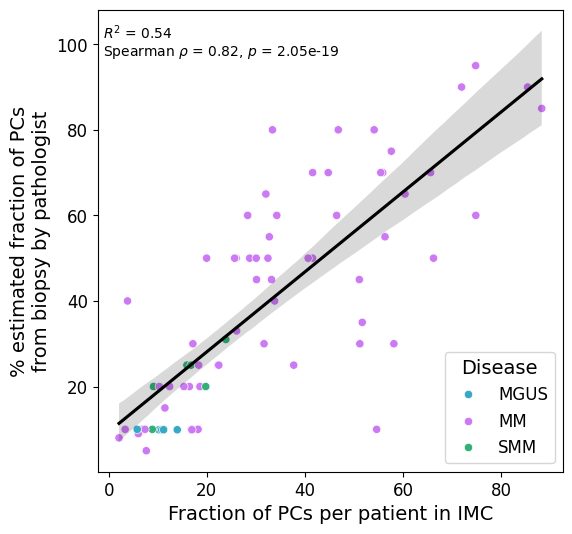

In [11]:
plt.style.use('default')
fig, ax = plt.subplots(figsize=(6, 6))
sns.scatterplot(x='PCs', y='% PCs from biopsy', hue='disease3', palette=disease3_color_map, data=biopsy_pc_fraction, ax=ax)
sns.regplot(x='PCs', y='% PCs from biopsy', data=biopsy_pc_fraction, scatter=False, color='black', ax=ax)
stat, p = spearmanr(biopsy_pc_fraction['PCs'], biopsy_pc_fraction['% PCs from biopsy'])
r_squared = r2_score(biopsy_pc_fraction['% PCs from biopsy'], biopsy_pc_fraction['PCs'])
ax.text(0.01, 0.90, f'$R^2$ = {r_squared:.2f}\nSpearman $\\rho$ = {stat:.2f}, $p$ = {p:.2e}',transform=ax.transAxes, fontsize=10)
ax.set_xlabel('Fraction of PCs per patient in IMC', fontsize=14)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)
ax.set_ylabel('% estimated fraction of PCs\nfrom biopsy by pathologist', fontsize=14)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)
plt.legend(title='Disease', title_fontsize=14, fontsize=12, loc='lower right')
plt.savefig(os.path.join(save_path_supp, f"biopsy_pc_fraction.{extension}"))

In [ ]:
spearmanr(biopsy_pc_fraction['PCs'], biopsy_pc_fraction['% PCs from biopsy'])

# Suppl. Fig 1

In [ ]:
plt.style.use('ggplot')
sc.tl.dendrogram(adata, groupby='Phenotype4')
sc.tl.rank_genes_groups(adata, groupby='Phenotype4', method='wilcoxon', use_raw=False)
sc.pl.rank_genes_groups(adata, n_genes=10, sharey=False, show=False, return_fig=True)
fig = plt.gcf()
fig.savefig(os.path.join(save_path_supp, f"phenotype_rank_genes_groups.{extension}"))

In [ ]:
df = pd.crosstab(
    index=adata.obs['disease3'],
    columns=adata.obs['Phenotype4'],
    normalize='index'
)
df

Phenotype4,Adipocytes,CD4 T,CD8 T,DCs,Endothelial,HLA-DR+ Macs/monos,HSPCs,MPO+,Macs/monos,Neutrophils,OB/RUNX2+,Osteoclasts,Osteocytes,PCs,Unknown
disease3,,,,,,,,,,,,,,,
MGUS,0.016332,0.037874,0.036000,0.028261,0.012020,0.095174,0.018374,0.058015,0.069929,0.271763,0.004555,0.000274,0.016835,0.096819,0.237774
MM,0.014601,0.031404,0.047856,0.008855,0.028722,0.046047,0.018594,0.059307,0.036428,0.202137,0.006019,0.001195,0.004776,0.365717,0.128341
SMM,0.022498,0.036887,0.042530,0.009592,0.020002,0.093624,0.015660,0.069991,0.033210,0.277332,0.003329,0.000106,0.005084,0.148016,0.222138


/var/folders/ry/jl4ll0zx1l709rh4r7_0cq6r0000gn/T/ipykernel_56685/1347160622.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)


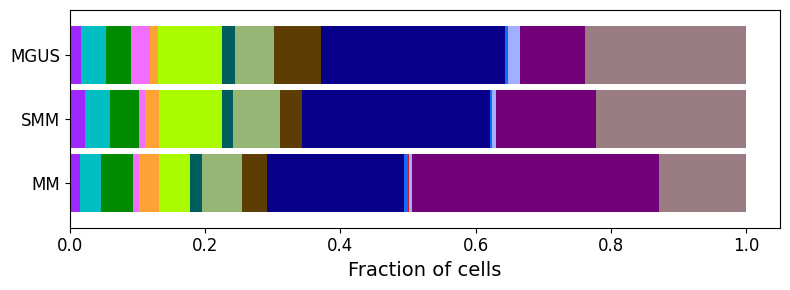

In [ ]:
plt.style.use('default')
fig, ax = plt.subplots(figsize=(8, 3))
df_reindexed = df.reindex(['MM', 'SMM', 'MGUS'])
df_reindexed.plot(kind='barh', stacked=True, colormap=phenotype_colors, width = 0.9, ax=ax, legend=False)
ax.set_ylabel('')
ax.set_xlabel('Fraction of cells', fontsize=14)
ax.set_yticklabels(['MM', 'SMM', 'MGUS'], fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)
#ax.legend(title='Phenotype', framealpha=0, fontsize=12, title_fontsize=14, bbox_to_anchor=(1, 1.04))
plt.tight_layout()
fig.savefig(os.path.join(save_path, f"phenotype_barplot.{extension}"))


In [ ]:
df = pd.crosstab(
    index=[adata.obs['patient_ID'], adata.obs['disease3']],
    columns=adata.obs['Phenotype4'],
    normalize='index'
)
df = df.reset_index().melt(id_vars=['patient_ID', 'disease3'], var_name='Phenotype4', value_name='Fraction')


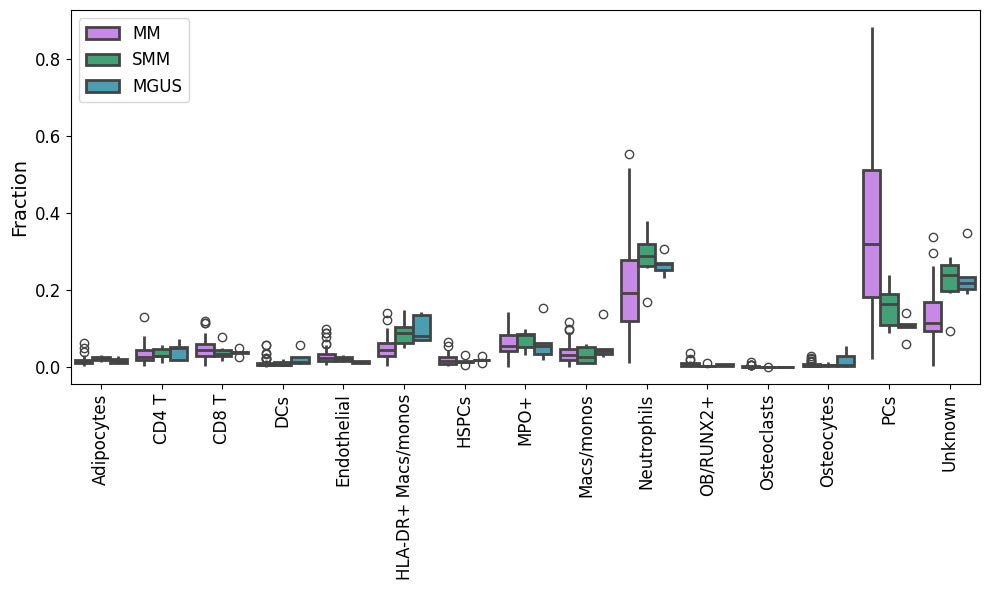

In [ ]:
plt.style.use('default')
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(data=df, x='Phenotype4', y='Fraction', hue='disease3', hue_order=['MM', 'SMM','MGUS'], palette=disease3_color_map, showcaps=False, linewidth=2, width=0.85)
plt.xlabel('')
plt.ylabel('Fraction', fontsize=14)
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
plt.legend(loc='upper left', fontsize=12, title='')
plt.tight_layout()
plt.savefig(os.path.join(save_path_supp, f"phenotype_freqs.{extension}"))

In [ ]:
kruskal_dict = {}

for celltype in df['Phenotype4'].unique():
    celltype_df = df[df['Phenotype4'] == celltype]
    groups = [group['Fraction'].values for _, group in celltype_df.groupby('disease3')]
    kruskal_result = kruskal(*groups)
    kruskal_dict[celltype] = {
        'H-statistic': kruskal_result.statistic,
        'p-value': kruskal_result.pvalue
    }
kruskal_dict

/var/folders/ry/jl4ll0zx1l709rh4r7_0cq6r0000gn/T/ipykernel_56685/2736411282.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = [group['Fraction'].values for _, group in celltype_df.groupby('disease3')]


{'Adipocytes': {'H-statistic': 5.103007518797, 'p-value': 0.07796433820055416},
 'CD4 T': {'H-statistic': 0.9639465797360742, 'p-value': 0.6175635567484837},
 'CD8 T': {'H-statistic': 1.5291497975708523, 'p-value': 0.4655317870450014},
 'DCs': {'H-statistic': 5.787822703612193, 'p-value': 0.055359259059334885},
 'Endothelial': {'H-statistic': 5.52498554077502,
  'p-value': 0.06313419299489868},
 'HLA-DR+ Macs/monos': {'H-statistic': 15.170292865029722,
  'p-value': 0.0005079404038544746},
 'HSPCs': {'H-statistic': 0.556017666543994, 'p-value': 0.7572901321350732},
 'MPO+': {'H-statistic': 0.6642883432357394, 'p-value': 0.7173838890025984},
 'Macs/monos': {'H-statistic': 1.897165991902824,
  'p-value': 0.3872894255026911},
 'Neutrophils': {'H-statistic': 5.212587412587453,
  'p-value': 0.07380759006212881},
 'OB/RUNX2+': {'H-statistic': 1.3252536936747674,
  'p-value': 0.5154954268588144},
 'Osteoclasts': {'H-statistic': 8.439025611896627,
  'p-value': 0.0147058073417765},
 'Osteocytes'

In [ ]:
kruskal_df = pd.DataFrame(kruskal_dict).T
kruskal_df

,H-statistic,p-value
Adipocytes,5.103008,0.077964
CD4 T,0.963947,0.617564
CD8 T,1.529150,0.465532
DCs,5.787823,0.055359
Endothelial,5.524986,0.063134
HLA-DR+ Macs/monos,15.170293,0.000508
HSPCs,0.556018,0.757290
MPO+,0.664288,0.717384
Macs/monos,1.897166,0.387289
Neutrophils,5.212587,0.073808


In [ ]:
dunn_dict = {}
for celltype in df['Phenotype4'].unique():
    if kruskal_df.loc[celltype, 'p-value'] < 0.05:   
        celltype_df = df[df['Phenotype4'] == celltype]
        dunn_result = sp.posthoc_dunn(celltype_df, val_col='Fraction', group_col='disease3', p_adjust='bonferroni')
        dunn_dict[celltype] = dunn_result
dunn_dict

{'HLA-DR+ Macs/monos':           MGUS        MM      SMM
 MGUS  1.000000  0.008119  1.00000
 MM    0.008119  1.000000  0.02016
 SMM   1.000000  0.020160  1.00000,
 'Osteoclasts':           MGUS        MM       SMM
 MGUS  1.000000  0.508647  1.000000
 MM    0.508647  1.000000  0.023533
 SMM   1.000000  0.023533  1.000000,
 'PCs':        MGUS        MM       SMM
 MGUS  1.000  0.009000  1.000000
 MM    0.009  1.000000  0.063555
 SMM   1.000  0.063555  1.000000,
 'Unknown':           MGUS        MM       SMM
 MGUS  1.000000  0.012663  1.000000
 MM    0.012663  1.000000  0.032685
 SMM   1.000000  0.032685  1.000000}

In [ ]:
dunn_dict['HLA-DR+ Macs/monos']

,MGUS,MM,SMM
MGUS,1.000000,0.008119,1.00000
MM,0.008119,1.000000,0.02016
SMM,1.000000,0.020160,1.00000


In [ ]:
dunn_dict['Unknown']

,MGUS,MM,SMM
MGUS,1.000000,0.012663,1.000000
MM,0.012663,1.000000,0.032685
SMM,1.000000,0.032685,1.000000
